In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Check for missing values
print("Missing values in dataset:\n", X.isnull().sum())

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData preprocessing complete.")


Missing values in dataset:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Data preprocessing complete.


In [2]:
# Importing Machine Learning Models and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression trained.")

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Classifier trained.")

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier trained.")

# Support Vector Machine (SVM)
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("Support Vector Machine trained.")

# k-Nearest Neighbors (k-NN)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print("k-Nearest Neighbors trained.")


Logistic Regression trained.
Decision Tree Classifier trained.
Random Forest Classifier trained.
Support Vector Machine trained.
k-Nearest Neighbors trained.


In [3]:
# Comparing Models
models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm,
    "k-NN": y_pred_knn
}

# Evaluate each model
print("\nModel Performance Comparison:")
for model_name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name}:")
    print(f"Accuracy = {acc:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model Performance Comparison:

Logistic Regression:
Accuracy = 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree:
Accuracy = 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest:
Accuracy = 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.9

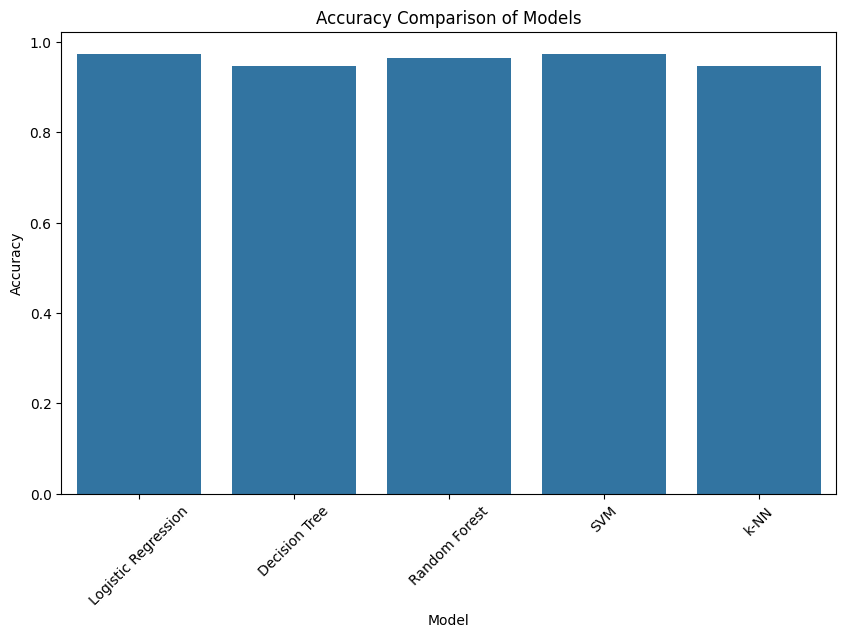


Best Performing Model: Logistic Regression
Worst Performing Model: Decision Tree


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Visualize Accuracy Scores
accuracy_scores = {model: accuracy_score(y_test, y_pred) for model, y_pred in models.items()}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Find the best and worst performers
best_model = max(accuracy_scores, key=accuracy_scores.get)
worst_model = min(accuracy_scores, key=accuracy_scores.get)

print(f"\nBest Performing Model: {best_model}")
print(f"Worst Performing Model: {worst_model}")
